In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/data_NO2_processed.csv', sep=';')
effects = ['volume_demand', 'volume_production', 'spot_price']

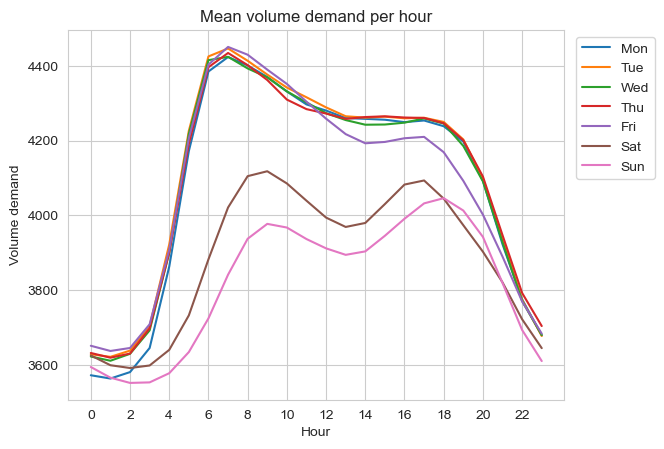

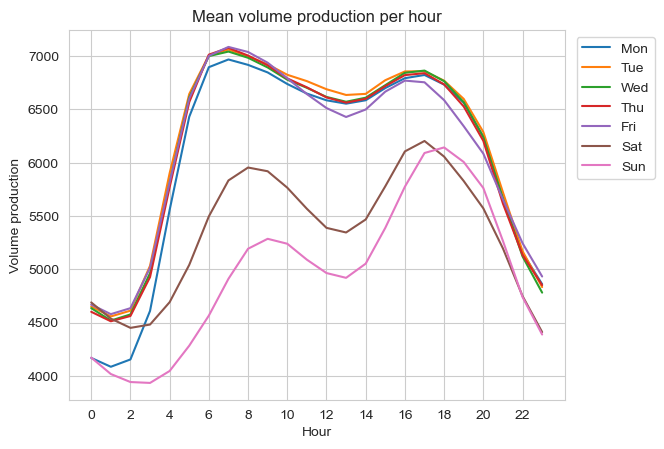

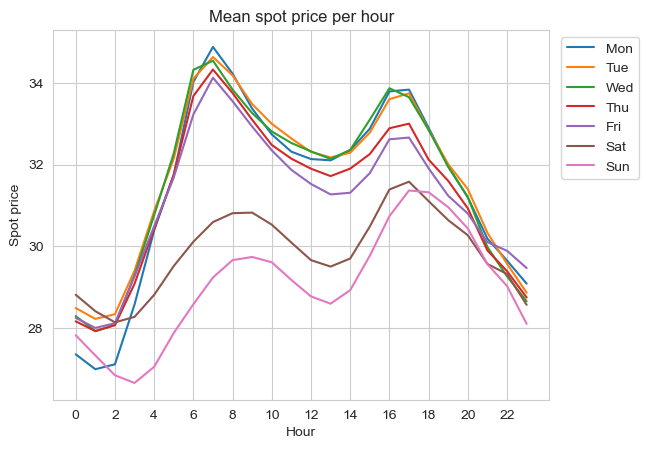

In [3]:
groups = ['dayofweek', 'hour']
hourly_data = data[effects + groups].groupby(groups).mean()
for var in effects:
    plt.plot(hourly_data.loc[0][var], label='Mon')
    plt.plot(hourly_data.loc[1][var], label='Tue')
    plt.plot(hourly_data.loc[2][var], label='Wed')
    plt.plot(hourly_data.loc[3][var], label='Thu')
    plt.plot(hourly_data.loc[4][var], label='Fri')
    plt.plot(hourly_data.loc[5][var], label='Sat')
    plt.plot(hourly_data.loc[6][var], label='Sun')

    pretty_name = var.replace('_', ' ')
    plt.title(f'Mean {pretty_name} per hour')
    plt.xlabel("Hour")
    plt.xticks(range(0, 23, 2))
    plt.ylabel(pretty_name.capitalize())
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()

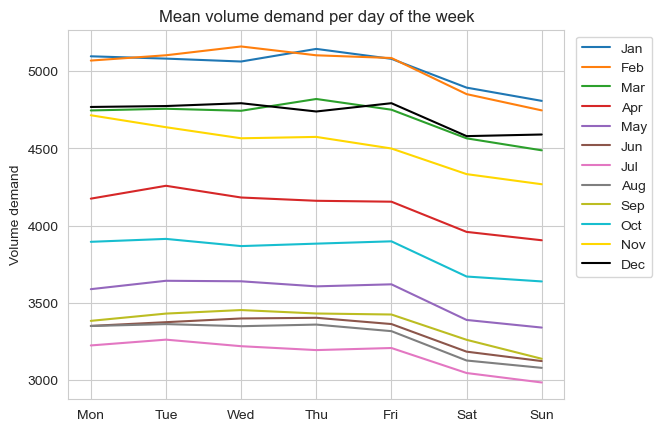

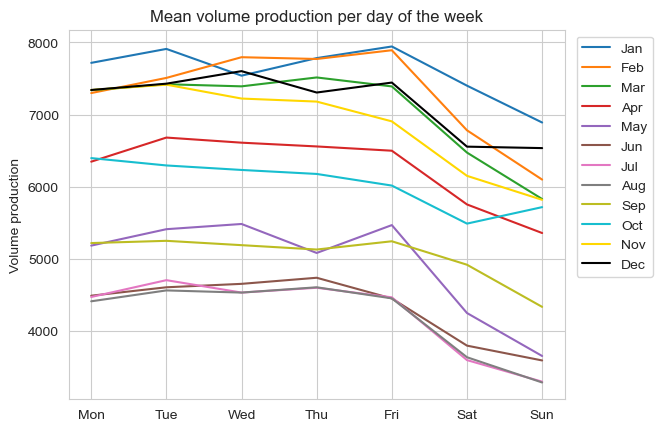

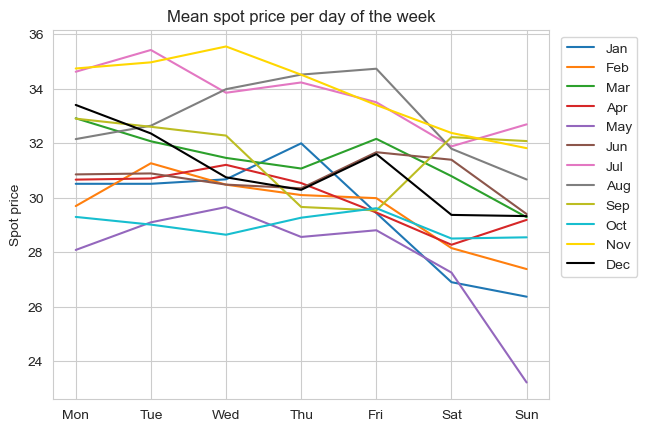

In [4]:
groups = ['month', 'dayofweek']
weekly_data = data[effects + groups].groupby(groups).mean()
for var in effects:
    plt.plot(weekly_data.loc[1][var], label='Jan')
    plt.plot(weekly_data.loc[2][var], label='Feb')
    plt.plot(weekly_data.loc[3][var], label='Mar')
    plt.plot(weekly_data.loc[4][var], label='Apr')
    plt.plot(weekly_data.loc[5][var], label='May')
    plt.plot(weekly_data.loc[6][var], label='Jun')
    plt.plot(weekly_data.loc[7][var], label='Jul')
    plt.plot(weekly_data.loc[8][var], label='Aug')
    plt.plot(weekly_data.loc[9][var], label='Sep')
    plt.plot(weekly_data.loc[10][var], label='Oct')
    plt.plot(weekly_data.loc[11][var], label='Nov', color='gold')
    plt.plot(weekly_data.loc[12][var], label='Dec', color='black')

    pretty_name = var.replace('_', ' ')
    plt.title(f'Mean {pretty_name} per day of the week')
    plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.ylabel(pretty_name.capitalize())
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()

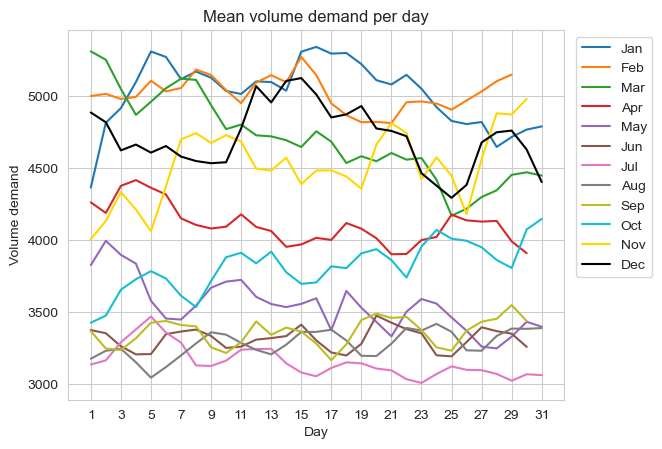

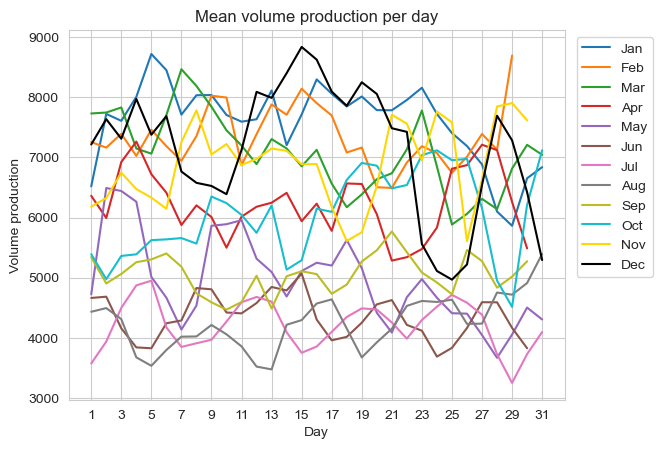

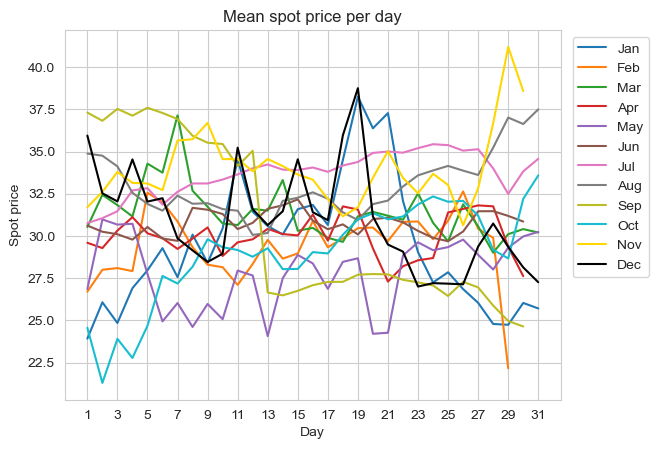

In [5]:
groups = ['month', 'day']
monthly_data = data[effects + groups].groupby(groups).mean()
for var in effects:
    plt.plot(monthly_data.loc[1][var], label='Jan')
    plt.plot(monthly_data.loc[2][var], label='Feb')
    plt.plot(monthly_data.loc[3][var], label='Mar')
    plt.plot(monthly_data.loc[4][var], label='Apr')
    plt.plot(monthly_data.loc[5][var], label='May')
    plt.plot(monthly_data.loc[6][var], label='Jun')
    plt.plot(monthly_data.loc[7][var], label='Jul')
    plt.plot(monthly_data.loc[8][var], label='Aug')
    plt.plot(monthly_data.loc[9][var], label='Sep')
    plt.plot(monthly_data.loc[10][var], label='Oct')
    plt.plot(monthly_data.loc[11][var], label='Nov', color='gold')
    plt.plot(monthly_data.loc[12][var], label='Dec', color='black')

    pretty_name = var.replace('_', ' ')
    plt.title(f'Mean {pretty_name} per day')
    plt.xlabel('Day')
    plt.xticks(range(1, 32, 2))
    plt.ylabel(pretty_name.capitalize())
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()

In [6]:
granger_data = data.drop(columns=['volume_production_rolling', 'volume_demand_rolling', 'target'])

max_lag = 12
causes = granger_data.columns

In [7]:
causality_matrix = pd.DataFrame(np.ones((len(causes), len(effects))), index=causes, columns=effects)

for cause in causes:
    for effect in effects:
        if cause != effect:
            test_result = grangercausalitytests(granger_data[[effect, cause]], max_lag, verbose=False)
            causality_matrix[effect][cause] = min(test[0]['ssr_ftest'][1] for test in test_result.values())

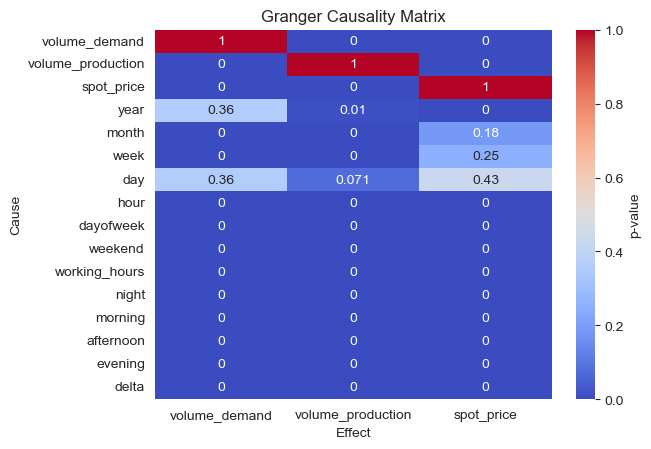

In [8]:
sns.heatmap(causality_matrix.round(5), annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title(f'Granger Causality Matrix')
plt.ylabel('Cause')
plt.xlabel('Effect')
plt.show()